In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import calendar

plt.style.use('seaborn-v0_8')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
data = pd.read_csv('climate_change.csv')

In [3]:
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month
data['Day'] = data['Time'].dt.day
data['Hour'] = data['Time'].dt.hour
data['TimeOfDay'] = pd.cut(data['Time'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
data['IsWeekend'] = data['Time'].dt.weekday // 5 == 1

In [4]:
data.head(2)

,Title,Score,Autor,Time,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked,Year,Month,Day,Hour,TimeOfDay,IsWeekend
0,I'm afraid climate change is going to kill me!...,718,Will_Power,2019-02-14 00:22:32,534,0.98,aqdmbz,climatechange,False,Feeling scared? Have you been listening to or ...,True,False,True,False,2019,2,14,0,NaN,False
1,The r/climatechange Verified User Flair Program,30,technologyisnatural,2022-08-21 20:53:23,14,0.91,wu9zny,climatechange,False,r/climatechange is a community centered around...,True,False,True,False,2022,8,21,20,Evening,True


#### Numbers of groups over time

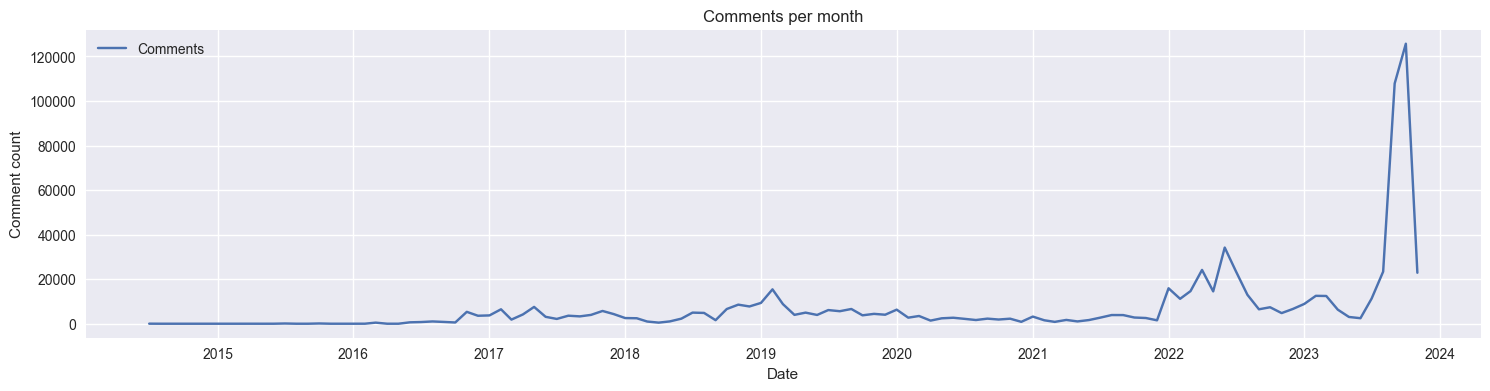

In [5]:
from datetime import datetime

def plot_comment_per_day():
    
    # Group data
    df = data[['Comments', 'Time']].copy(deep=True)
    df['YearMonth'] = df['Time'].apply(lambda x: datetime(year=x.year, month=x.month, day=1))
    df = df.groupby(by='YearMonth').agg({ 'Comments': 'sum' }).reset_index()
    
    # Draw
    plt.figure(figsize=(18, 4))
    plt.plot(df['YearMonth'], df['Comments'], label='Comments')
    plt.title('Comments per month')
    plt.xlabel('Date')
    plt.ylabel('Comment count')
    plt.legend()
    plt.show()

plot_comment_per_day()

The chart show how the number of comments slowly increases and present more activity between 2022 and 2023 and also presnet a huge increment ending 2023.

#### Total post per month

    Month  Title  Score  Autor  Time  Comments  UpvoteRatio  PostId  \
0       1    792    792    756   792       792          792     792   
1       2    700    700    651   700       700          700     700   
2       3    644    644    623   644       644          644     644   
3       4    575    575    556   575       575          575     575   
4       5    619    619    593   619       619          619     619   
5       6    645    645    602   645       645          645     645   
6       7   1164   1164   1124  1164      1164         1164    1164   
7       8   1451   1451   1395  1451      1451         1451    1451   
8       9   2820   2820   2758  2820      2820         2820    2820   
9      10   4373   4373   4332  4373      4373         4373    4373   
10     11   1447   1447   1412  1447      1447         1447    1447   
11     12    745    745    716   745       745          745     745   

    Subreddit  is_nsfw  SelfText  IsSelfText  IsPinned  IsStickied  IsLocked

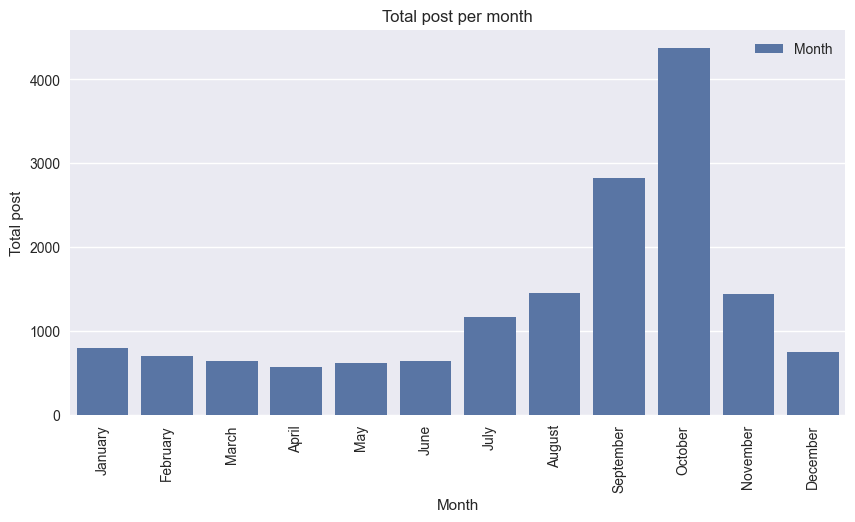

In [6]:
def plot_score_per_month():

    grouped_data = data.groupby(by='Month').agg('count').reset_index()
    print(grouped_data)
    plt.figure(figsize=(10, 5))
    sns.barplot(data=grouped_data, x='Month', y='Score', label="Month")
    plt.xticks(labels=[calendar.month_name[x] for x in grouped_data['Month']], rotation=90, ticks=[*range(0, 12)])
    plt.title('Total post per month')
    plt.xlabel('Month')
    plt.ylabel('Total post')
    plt.legend()
    plt.show(); 

plot_score_per_month()

#### Len of text vs score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


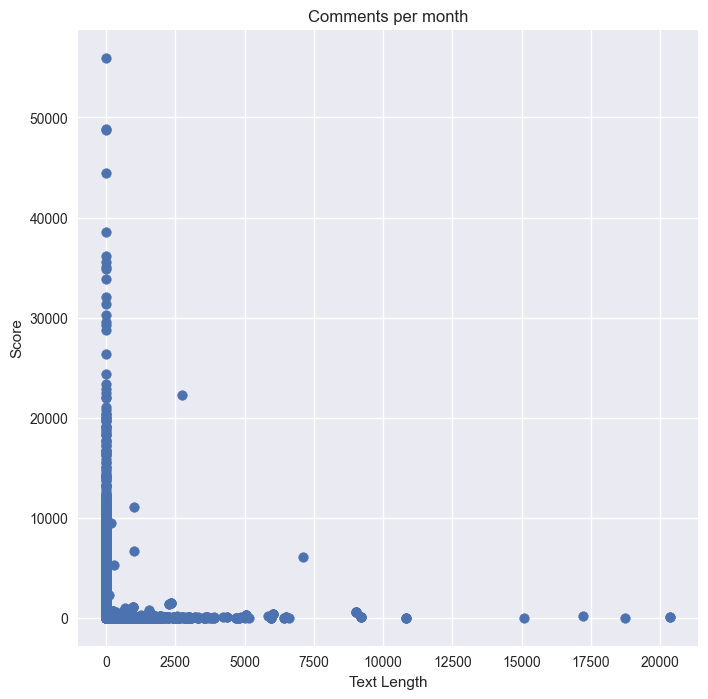

In [7]:
def plot_text_length_vs_score():
    
    # Group data
    df = data[['SelfText', 'Score']].copy(deep=True)
    df['TextLength'] = df['SelfText'].apply(lambda x: len(str(x)))

    # Draw
    plt.figure(figsize=(8, 8))
    plt.scatter(x=df['TextLength'], y=df['Score'])
    plt.title('Comments per month')
    plt.xlabel('Text Length')
    plt.ylabel('Score')
    plt.legend()
    plt.show();

plot_text_length_vs_score()

#### Score vs comments

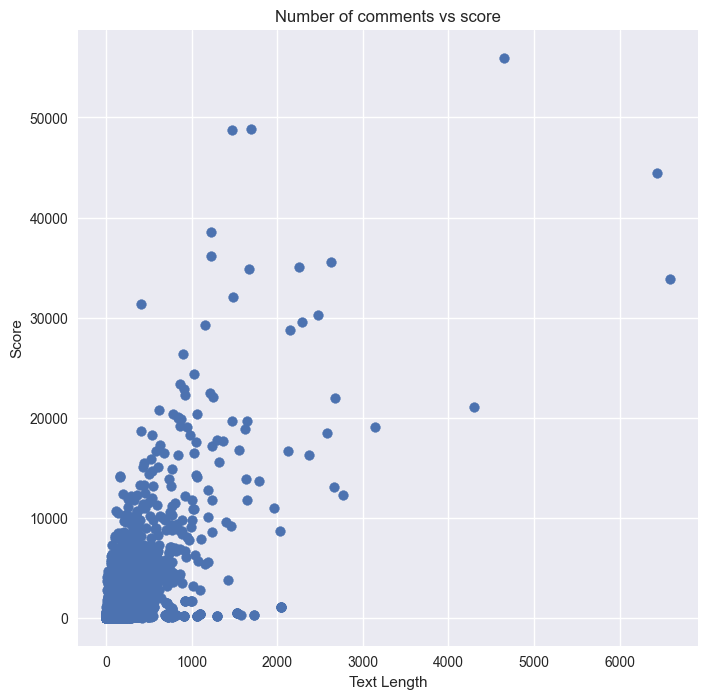

In [8]:
def plot_score_vs_comments():
    
    # Draw
    plt.figure(figsize=(8, 8))
    plt.scatter(x=data['Comments'], y=data['Score'])
    plt.title('Number of comments vs score')
    plt.xlabel('Text Length')
    plt.ylabel('Score')
    plt.show();

plot_score_vs_comments()

#### Top authors

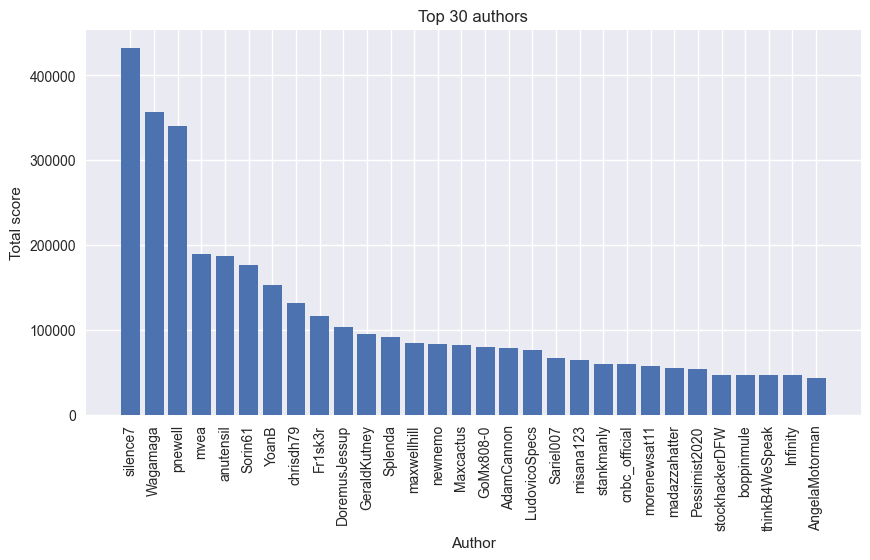

In [9]:
#df.sort_values(by='Score', ascending=False)
def top_authors():
    df = data.groupby(by='Autor').agg({ 'Score': 'sum' }).reset_index().sort_values(by='Score', ascending=False).head(30)

    plt.figure(figsize=(10, 5))
    plt.bar(x=df['Autor'], height=df['Score'])
    plt.title('Top 30 authors')
    plt.xlabel('Author')
    plt.ylabel('Total score')
    plt.xticks(rotation=90)
    plt.show();

top_authors()

##### Mean score per month

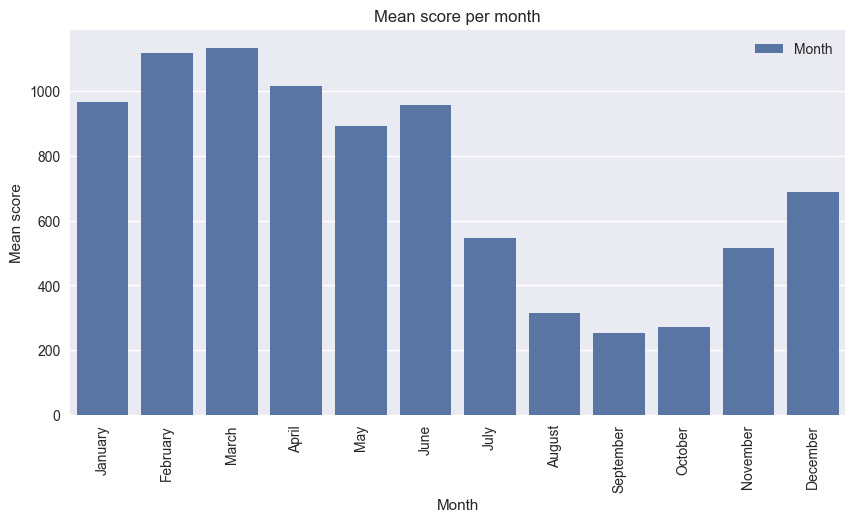

In [10]:
import seaborn as sns
import calendar

def plot_mean_score_per_month():

    grouped_data = data.groupby(by='Month').agg({ 'Score': 'mean' }).reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(data=grouped_data, x='Month', y='Score', label="Month")
    plt.xticks(labels=[calendar.month_name[x] for x in grouped_data['Month']], rotation=90, ticks=[*range(0, 12)])
    plt.title('Mean score per month')
    plt.xlabel('Month')
    plt.ylabel('Mean score')
    plt.legend()
    plt.show(); 

plot_mean_score_per_month()

##### 

C:\Users\acorr\AppData\Local\Temp\ipykernel_6708\2060458676.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(by='TimeOfDay').agg('count').reset_index()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


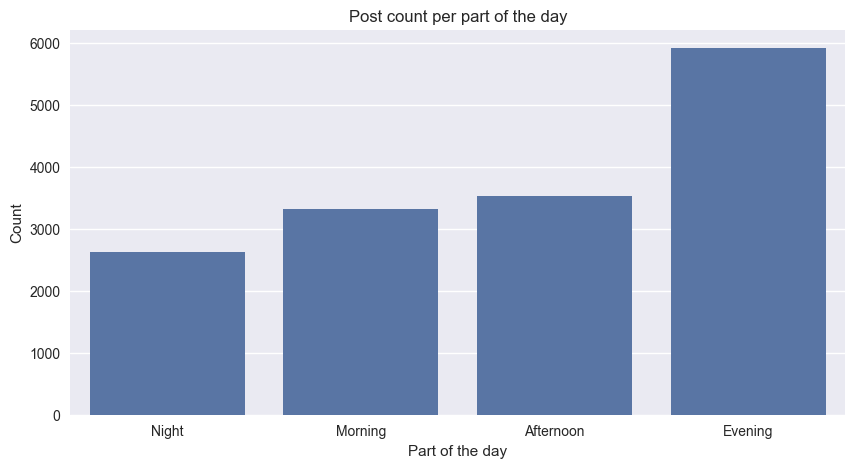

In [11]:
def plot_count_post_per_part_of_day():

    grouped_data = data.groupby(by='TimeOfDay').agg('count').reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(data=grouped_data, x='Month', y='Score')
    plt.xticks(labels=['Night', 'Morning', 'Afternoon', 'Evening'], ticks=[*range(0, 4)])
    plt.title('Post count per part of the day')
    plt.xlabel('Part of the day')
    plt.ylabel('Count')
    plt.legend()
    plt.show(); 

plot_count_post_per_part_of_day()

#### Popular words in high score posts

In [12]:
data[data['Score'] > 4000]

,Title,Score,Autor,Time,Comments,UpvoteRatio,PostId,Subreddit,is_nsfw,SelfText,IsSelfText,IsPinned,IsStickied,IsLocked,Year,Month,Day,Hour,TimeOfDay,IsWeekend
1888,Pete Buttigieg Has to Keep Explaining to Repub...,4413,wdcmsnbcgay,2023-10-01 13:44:30,130,0.96,16x1lit,climate,False,NaN,False,False,False,False,2023,10,1,13,Afternoon,True
6282,Pete Buttigieg Has to Keep Explaining to Repub...,4410,wdcmsnbcgay,2023-10-01 13:44:30,130,0.96,16x1lit,climate,False,NaN,False,False,False,False,2023,10,1,13,Afternoon,True
8310,Billions of crabs went missing around Alaska. ...,4384,Azurebluenomad,2023-10-20 00:58:25,741,0.97,17byrco,climatechange,False,NaN,False,False,False,False,2023,10,20,0,NaN,False
9885,New Republican US House Speaker Champions Foss...,4943,silence7,2023-10-26 14:00:17,520,0.96,17gx72g,climate,False,NaN,False,False,False,False,2023,10,26,14,Afternoon,False
11678,Billions of crabs went missing around Alaska. ...,4379,Azurebluenomad,2023-10-20 00:58:25,741,0.97,17byrco,climatechange,False,NaN,False,False,False,False,2023,10,20,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,Exxon Could Have Helped Stop Climate Change 30...,4010,silence7,2022-09-20 18:38:31,84,0.99,xjgram,environment,False,NaN,False,False,False,False,2022,9,20,18,Afternoon,False
14827,Majority Of National Park Service Board Resign...,4003,mvea,2018-01-17 11:49:35,118,0.95,7r0gfo,environment,False,NaN,False,False,False,False,2018,1,17,11,Morning,False
14828,Starbucks is eliminating plastic straws from a...,4003,AdamCannon,2018-07-09 11:11:53,221,0.96,8xalp2,environment,False,NaN,False,False,False,False,2018,7,9,11,Morning,False
14829,#NoMoreExcuses: Mass Action on Capitol Hill to...,4006,dont_tread_on_dc,2018-12-10 16:58:07,114,0.97,a4xej8,environment,False,NaN,False,False,False,False,2018,12,10,16,Afternoon,False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


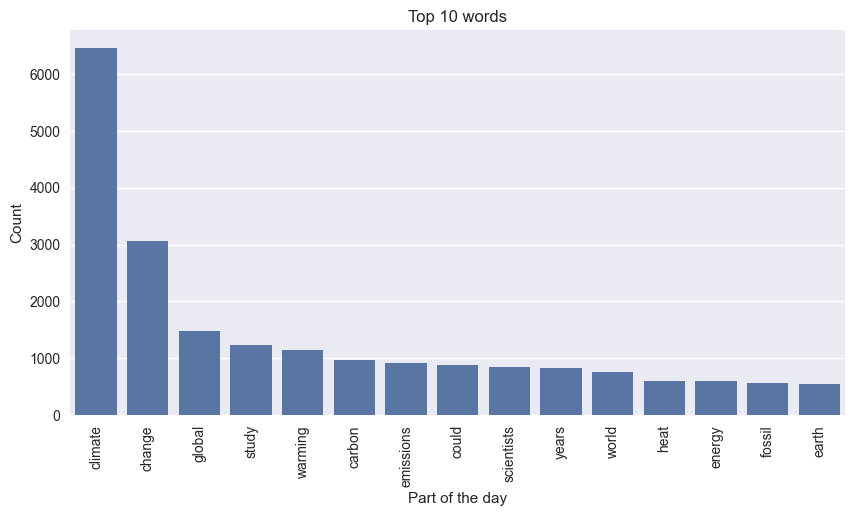

In [13]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

def plot_most_common_words(n):

    text = ' '.join([title for title in data['Title']]).lower()
    en_stopwords = stopwords.words('english')
    text_filtered = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text_filtered)
    word_filtered = [w for w in tokens if w not in en_stopwords and len(w) > 3]

    counter_dict = nltk.FreqDist(word_filtered)
    top_15 = list(counter_dict.most_common(15))
    df = pd.DataFrame(top_15, columns=['Word', 'Count'])

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='Word', y='Count')
    plt.xticks(rotation=90)
    plt.title(f'Top {n} words')
    plt.xlabel('Part of the day')
    plt.ylabel('Count')
    plt.legend()
    plt.show(); 

plot_most_common_words(10)
    

##### Evolution top 10 more important words over time

In [14]:
def get_all_title_text():
    
    text = ' '.join([title for title in data['Title']]).lower()
    en_stopwords = stopwords.words('english')
    text_filtered = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text_filtered)
    word_filtered = [w for w in tokens if w not in en_stopwords and len(w) > 3]

    counter_dict = nltk.FreqDist(word_filtered)
    top_n = list(counter_dict.most_common(15))
    
    return top_n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


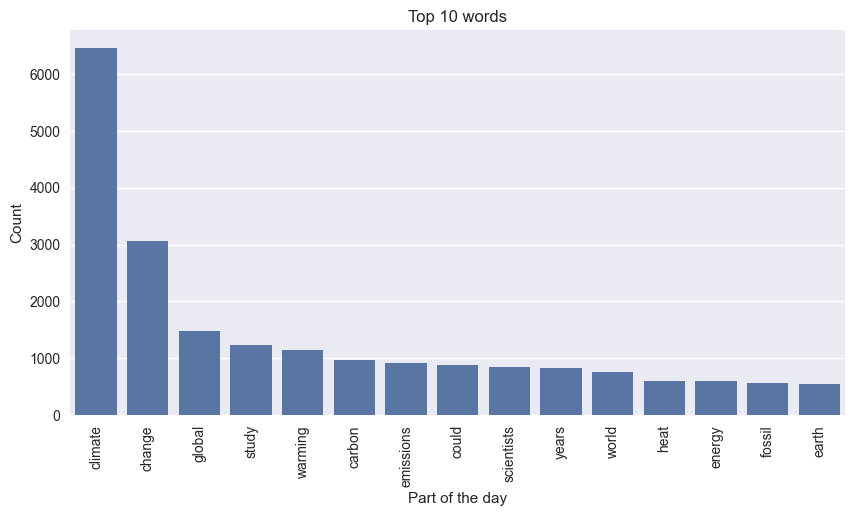

In [15]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

def plot_most_common_words(n):

    top_n = get_all_title_text()
    df = pd.DataFrame(top_n, columns=['Word', 'Count'])

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='Word', y='Count')
    plt.xticks(rotation=90)
    plt.title(f'Top {n} words')
    plt.xlabel('Part of the day')
    plt.ylabel('Count')
    plt.legend()
    plt.show(); 

plot_most_common_words(10)
    

C:\Users\acorr\AppData\Local\Temp\ipykernel_6708\628725025.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['Time'].apply(lambda x: datetime(year=x.year, month=x.month, day=1))


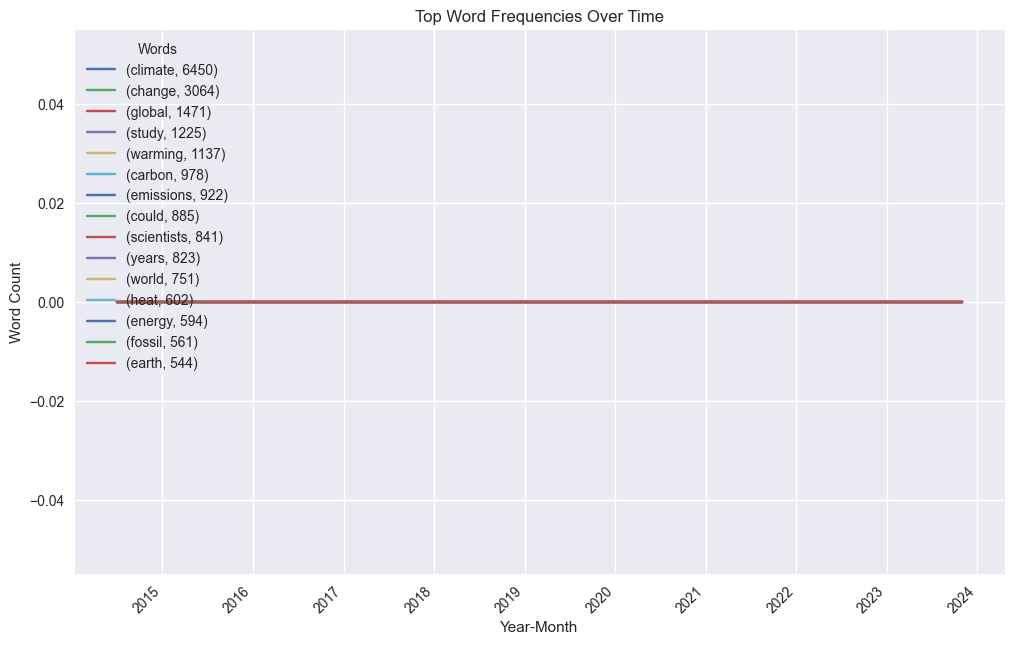

In [16]:
import pandas as pd
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Group data
def plot_words_over_time(n):

    df = data[['Title', 'Time']]
    df['YearMonth'] = df['Time'].apply(lambda x: datetime(year=x.year, month=x.month, day=1))
    df.groupby(by='YearMonth')['Title'].agg(' '.join).reset_index()

    top_n = get_all_title_text()

    monthly_data = df.groupby(by='YearMonth')['Title'].agg(' '.join).reset_index()

    # Create a DataFrame to store counts
    word_count_over_time = pd.DataFrame(index=monthly_data['YearMonth'], columns=top_n)

    # Count the occurrences of each top word for each month
    for month in monthly_data['YearMonth']:
        titles = ' '.join(monthly_data[monthly_data['YearMonth'] == month]['Title'].tolist())
        word_count = Counter(word_tokenize(titles.lower()))
        for word in top_n:
            word_count_over_time.at[month, word] = word_count[word]

    # Draw
    word_count_over_time.plot(figsize=(12, 8), title='Top Word Frequencies Over Time')
    plt.xlabel('Year-Month')
    plt.ylabel('Word Count')
    plt.xticks(rotation=45)
    plt.legend(title='Words')
    plt.show()

plot_words_over_time(15)
